# Decision Trees

## Setup

In [80]:
import os
if os.getcwd().endswith("notebooks"):
    os.chdir('..')

print("Current working directory: ", os.getcwd())
if not os.getcwd().endswith("Decision-Trees"):
    raise ValueError("Please change working directory to 'path/Decision-Trees' before proceeding")

Current working directory:  /Users/irellzane/MLprojects/Decision-Trees


In [81]:
!pip install -r requirements.txt

In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Load Data

In [83]:
from sklearn.datasets import load_iris

iris = load_iris(as_frame=True)
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [84]:
list(iris)

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [85]:
iris_data = iris.data
X = iris_data[["petal length (cm)", "petal width (cm)"]].values
y = iris.target

## Training and Visualizing

In [86]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2, random_state=42)

## Graphviz

In [87]:
from sklearn.tree import export_graphviz

export_graphviz(
    tree_clf, 
    out_file="visualization/iris_tree.dot", 
    feature_names=["petal length (cm)", "petal width (cm)"],
    class_names=iris.target_names,
    rounded=True,
    filled=True
)

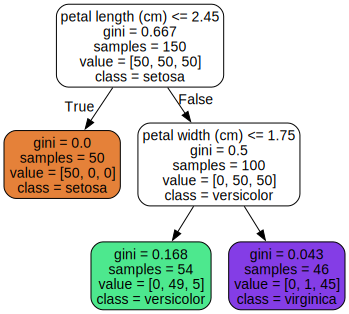

In [88]:
from graphviz import Source

Source.from_file("visualization/iris_tree.dot")

In [89]:
!dot -Tpng visualization/iris_tree.dot -o visualization/iris_tree.png

## Predictions

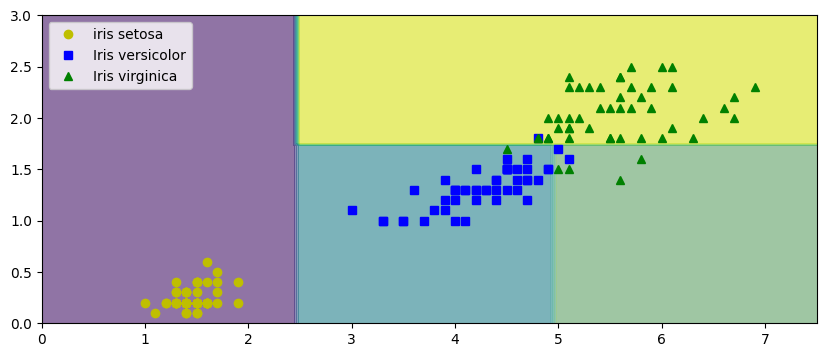

In [95]:
plt.figure(figsize=(10, 4))

plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="iris setosa")
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris virginica")

tree_clf_deeper = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_clf_deeper.fit(X, y)

lengths = np.linspace(0, 7.5, 100)
widths = np.linspace(0, 3.0, 100)

length_mesh, width_mesh = np.meshgrid(lengths, widths)
X_mesh = np.c_[length_mesh.ravel(), width_mesh.ravel()]
y_pred = tree_clf.predict(X_mesh).reshape(length_mesh.shape)
y_deep_pred = tree_clf_deeper.predict(X_mesh).reshape(length_mesh.shape)

plt.contourf(length_mesh, width_mesh, y_pred, alpha=.5)
plt.contourf(length_mesh, width_mesh, y_deep_pred, alpha=.2)
plt.legend()
plt.show()

## Decision Tree Proba

In [96]:
tree_clf.predict_proba([[5, 1.5]]).round(3)

array([[0.   , 0.907, 0.093]])

In [97]:
help(tree_clf.tree_)

Help on Tree object:

class Tree(builtins.object)
 |  Array-based representation of a binary decision tree.
 |
 |  The binary tree is represented as a number of parallel arrays. The i-th
 |  element of each array holds information about the node `i`. Node 0 is the
 |  tree's root. You can find a detailed description of all arrays in
 |  `_tree.pxd`. NOTE: Some of the arrays only apply to either leaves or split
 |  nodes, resp. In this case the values of nodes of the other type are
 |  arbitrary!
 |
 |  Attributes
 |  ----------
 |  node_count : int
 |      The number of nodes (internal nodes + leaves) in the tree.
 |
 |  capacity : int
 |      The current capacity (i.e., size) of the arrays, which is at least as
 |      great as `node_count`.
 |
 |  max_depth : int
 |      The depth of the tree, i.e. the maximum depth of its leaves.
 |
 |  children_left : array of int, shape [node_count]
 |      children_left[i] holds the node id of the left child of node i.
 |      For leaves, childre

## Load moons

In [98]:
from sklearn.datasets import make_moons

X_moons, y_moons = make_moons(n_samples=150, noise=0.2, random_state=42)

tree_clf1 = DecisionTreeClassifier(random_state=42)
tree_clf2 = DecisionTreeClassifier(min_samples_leaf=5, random_state=42)
tree_clf1.fit(X_moons, y_moons)
tree_clf2.fit(X_moons, y_moons)

DecisionTreeClassifier(min_samples_leaf=5, random_state=42)

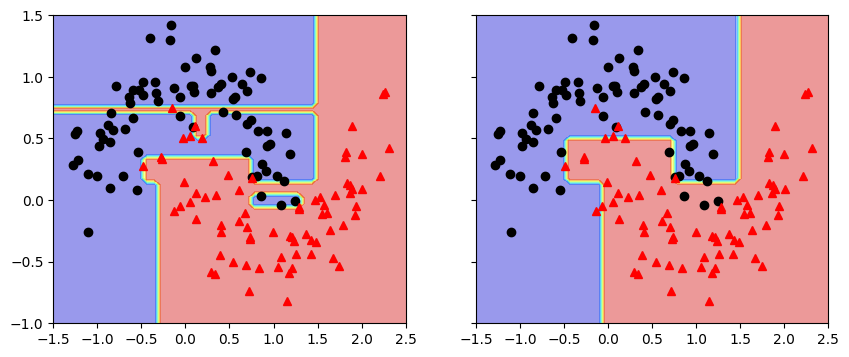

In [131]:
x1s = np.linspace(-1.5, 2.5)
x2s = np.linspace(-1, 1.5)
x1_mesh, x2_mesh = np.meshgrid(x1s, x2s)

X = np.c_[x1_mesh.ravel(), x2_mesh.ravel()]
y_pred1 = tree_clf1.predict(X).reshape(x1_mesh.shape)
y_pred2 = tree_clf2.predict(X).reshape(x1_mesh.shape)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 4), sharey=True)
ax1.contourf(x1_mesh, x2_mesh, y_pred1, cmap="jet", alpha=0.4)
ax2.contourf(x1_mesh, x2_mesh, y_pred2, cmap="jet", alpha=0.4)

for ax in (ax1, ax2):
    ax.plot(X_moons[:, 0][y_moons==0], X_moons[:, 1][y_moons==0], "ko")
    ax.plot(X_moons[:, 0][y_moons==1], X_moons[:, 1][y_moons==1], "r^")

plt.show()